In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'D:\COURSES\AI\Epsilon Ai\Session 37\Housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [4]:
df.isnull().mean() *100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

In [5]:
df.dropna(inplace=True,axis=0)

In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df.duplicated().sum()

0

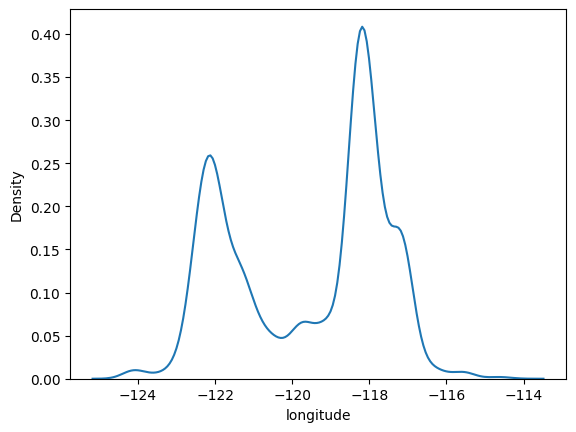

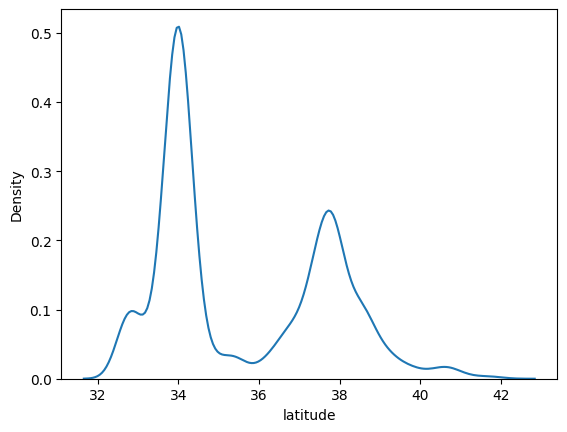

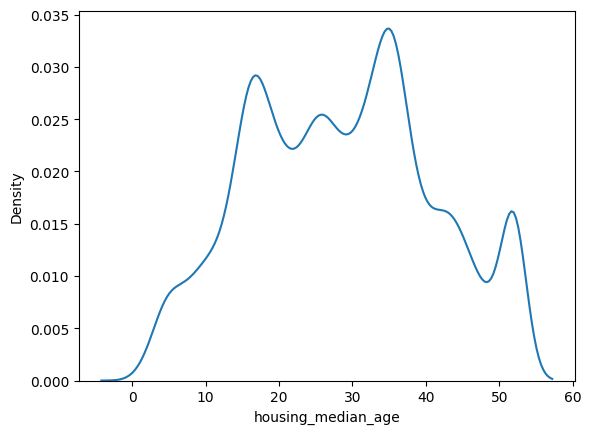

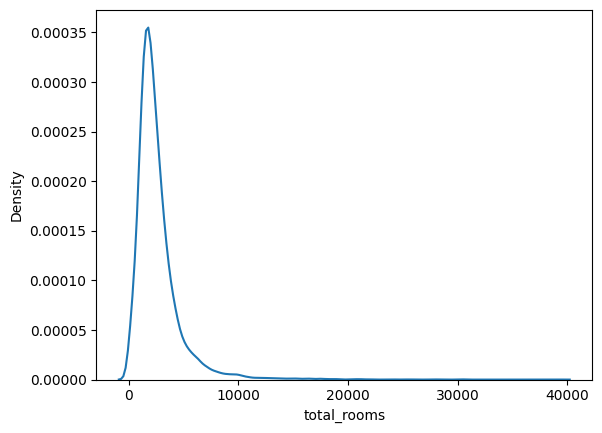

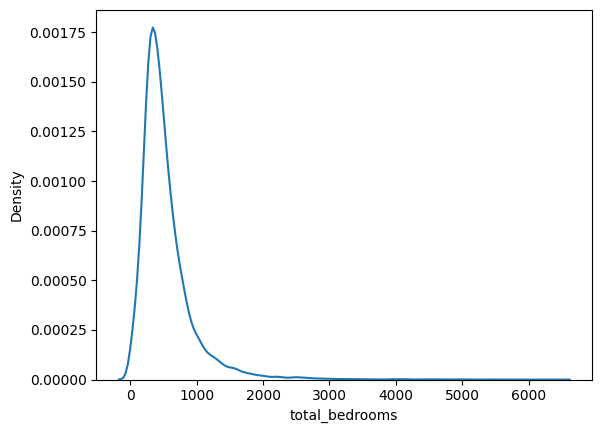

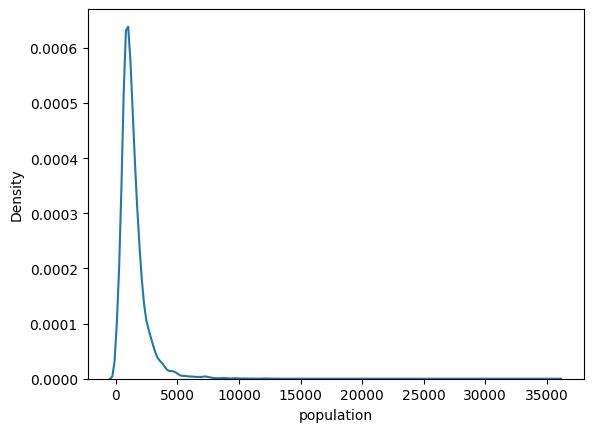

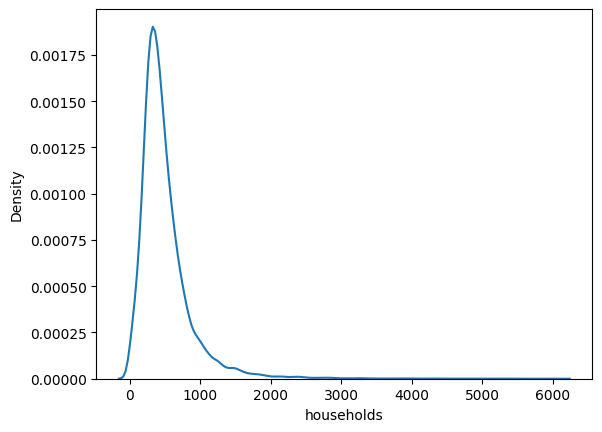

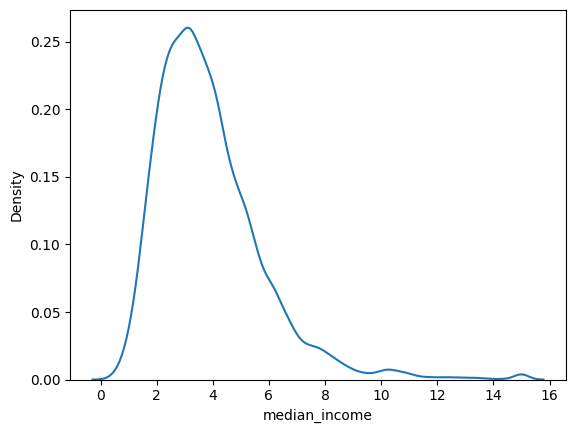

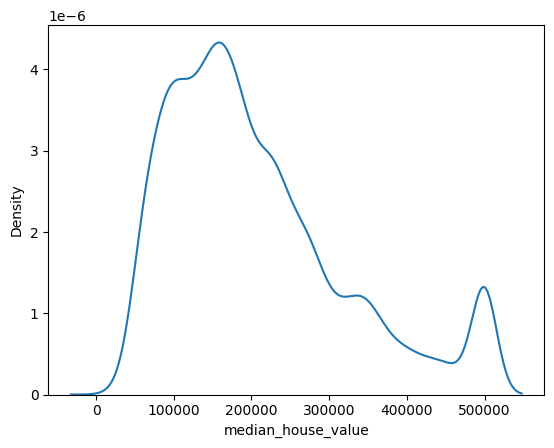

In [8]:
for col in df.columns:
  plt.figure()
  sns.kdeplot(x=df[col])

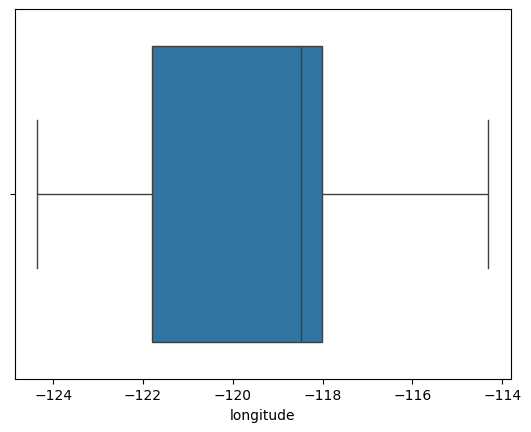

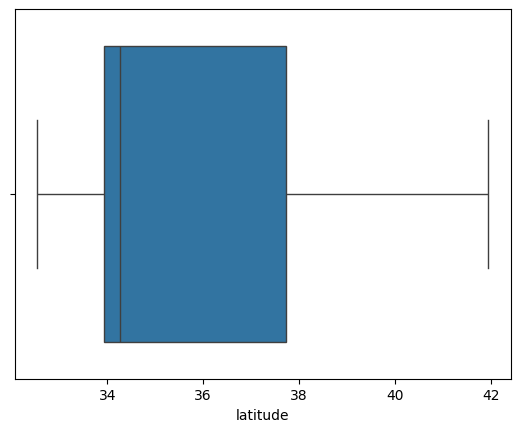

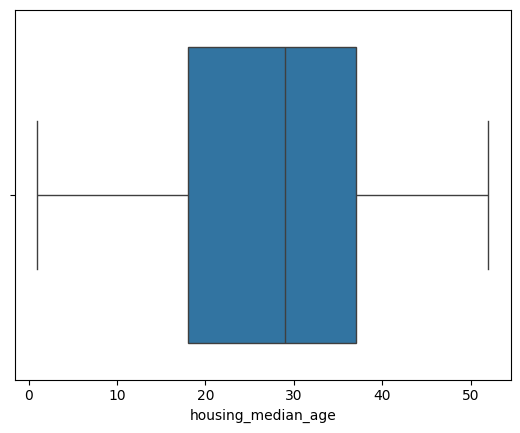

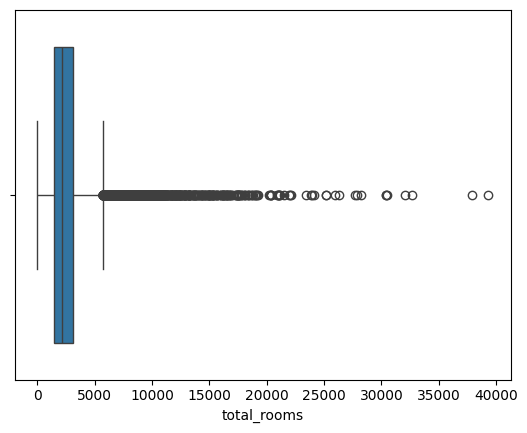

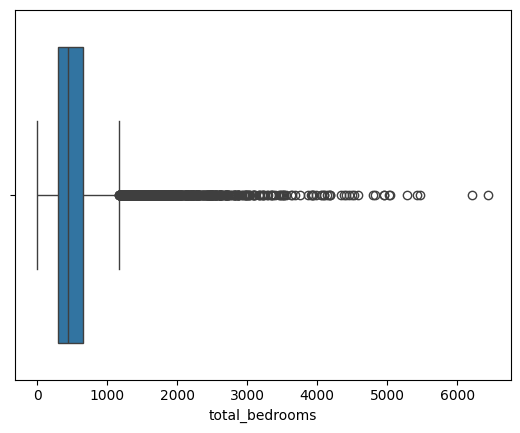

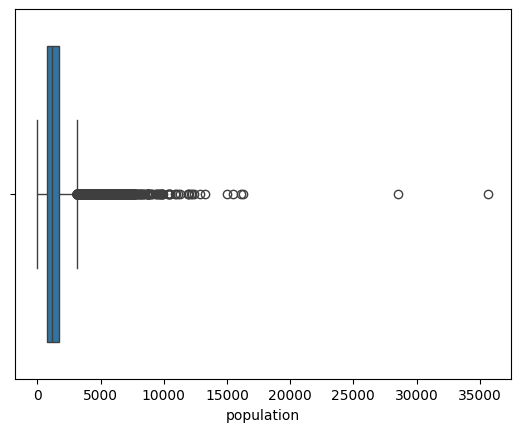

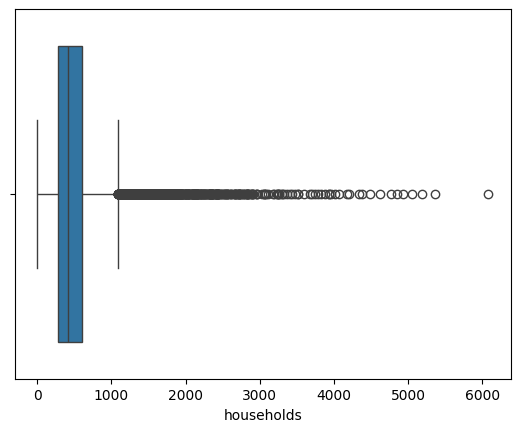

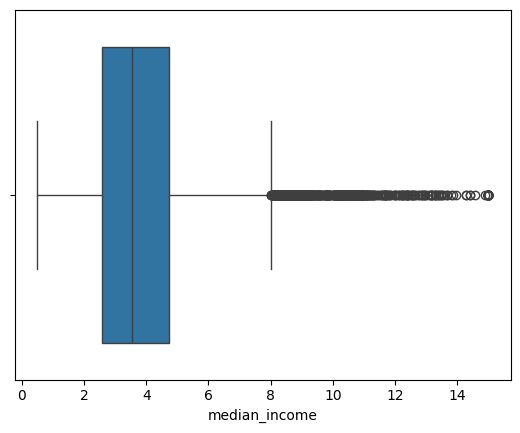

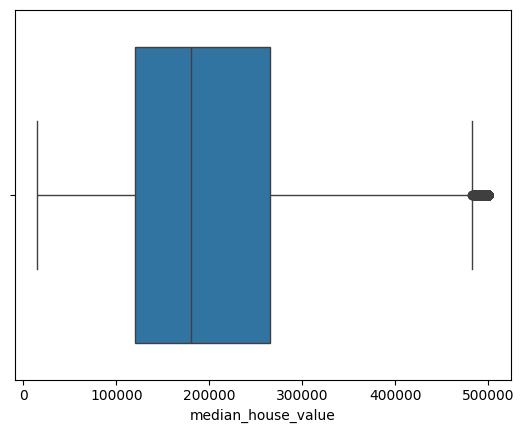

In [9]:
for col in df.columns:
  plt.figure()
  sns.boxplot(x=df[col])

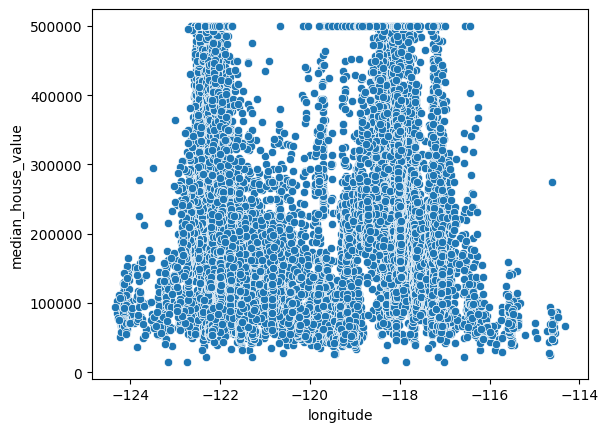

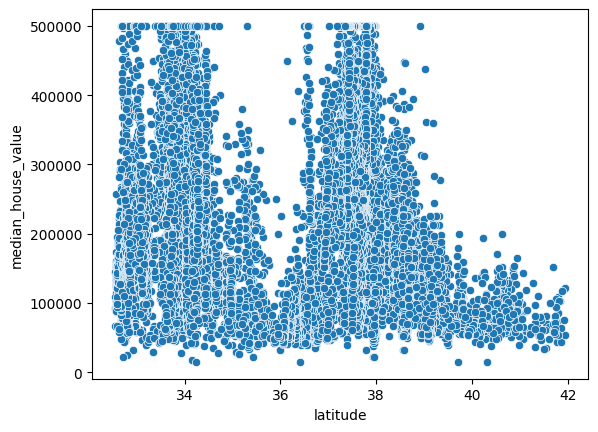

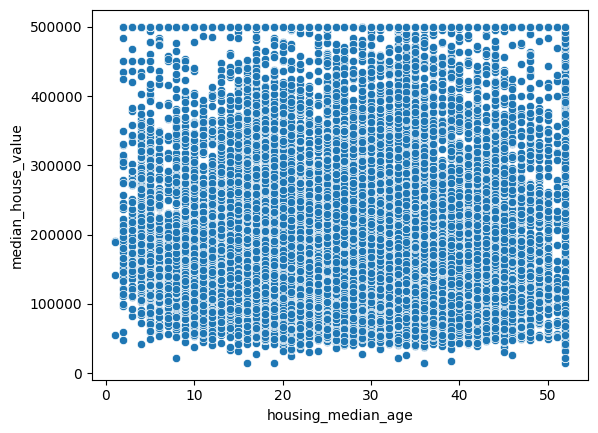

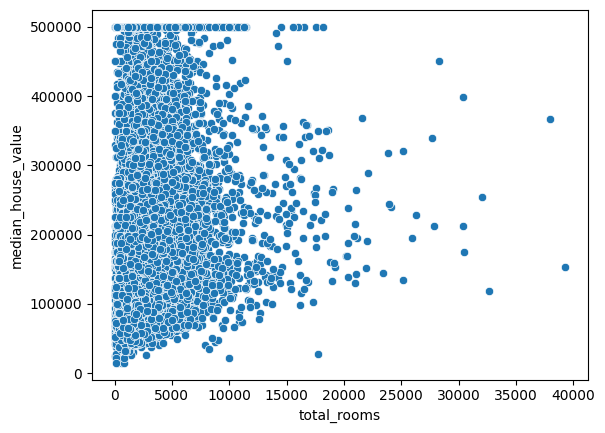

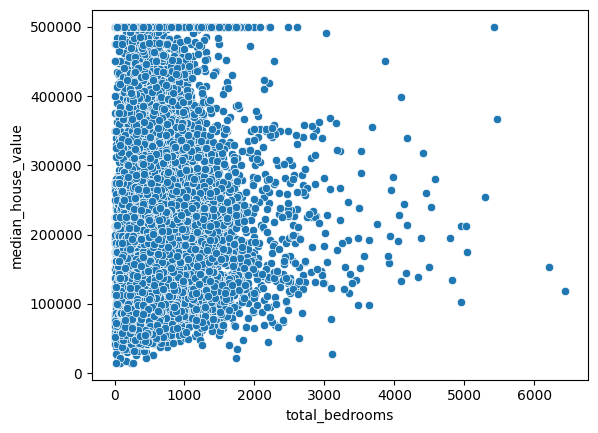

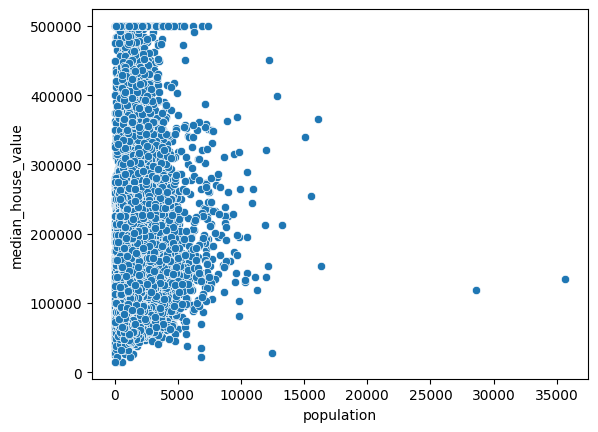

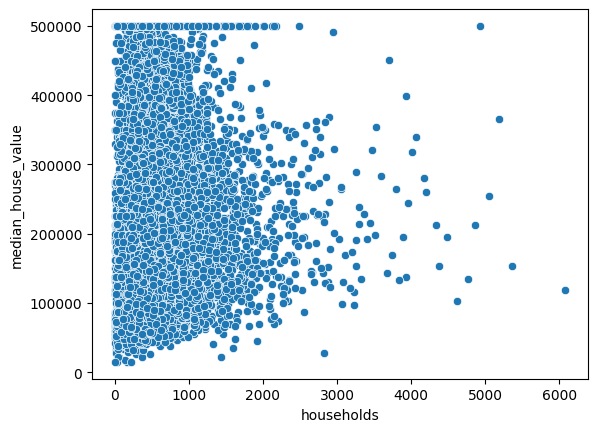

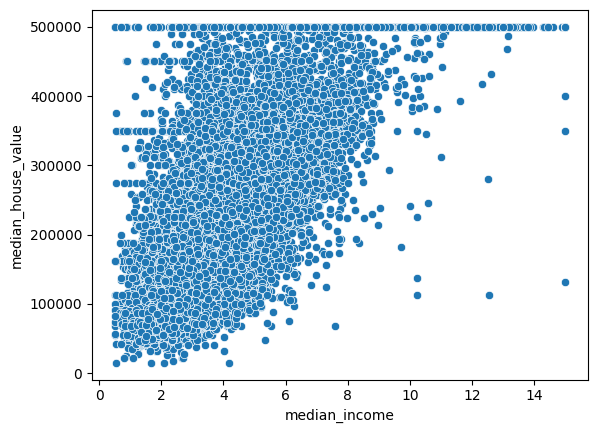

In [10]:
for col in df.columns[:-1]:
  plt.figure()
  sns.scatterplot(x=df[col],y=df['median_house_value'])

In [11]:
! pip install datasist


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from datasist.structdata import detect_outliers

In [13]:
idx=detect_outliers(df,0,df.columns)
len(idx)

2999

In [14]:
df.drop(idx,axis=0,inplace=True)

In [15]:
df.reset_index(inplace=True,drop=True)

<Axes: >

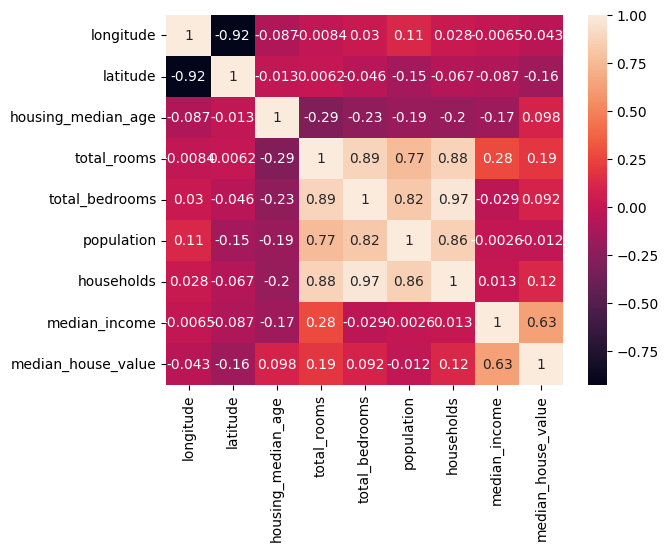

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
x,y=df[df.columns[:-1]],df['median_house_value']

In [18]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.24,37.85,52,1467,190.0,496,177,7.2574
1,-122.25,37.85,52,1274,235.0,558,219,5.6431
2,-122.25,37.85,52,1627,280.0,565,259,3.8462
3,-122.25,37.85,52,919,213.0,413,193,4.0368
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591


In [19]:
from sklearn.feature_selection import SequentialFeatureSelector , SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [20]:
pl = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

In [21]:
pl

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [22]:
back_elim=SequentialFeatureSelector(estimator=pl,
                                    n_features_to_select='auto',
                                    tol=None,
                                    direction="backward")
back_elim

SequentialFeatureSelector(direction='backward',
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('linearregression',
                                                     LinearRegression())]),
                          n_features_to_select='auto')

In [23]:
back_elim.fit(x,y)

SequentialFeatureSelector(direction='backward',
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('linearregression',
                                                     LinearRegression())]),
                          n_features_to_select='auto')

In [24]:
selected_features=pd.DataFrame(back_elim.transform(x),columns=back_elim.get_feature_names_out())
selected_features

,longitude,latitude,total_bedrooms,median_income
0,-122.24,37.85,190.0,7.2574
1,-122.25,37.85,235.0,5.6431
2,-122.25,37.85,280.0,3.8462
3,-122.25,37.85,213.0,4.0368
4,-122.25,37.84,489.0,3.6591
...,...,...,...,...
17429,-121.09,39.48,374.0,1.5603
17430,-121.21,39.49,150.0,2.5568
17431,-121.22,39.43,485.0,1.7000
17432,-121.32,39.43,409.0,1.8672


In [25]:
new_df=selected_features
new_df

,longitude,latitude,total_bedrooms,median_income
0,-122.24,37.85,190.0,7.2574
1,-122.25,37.85,235.0,5.6431
2,-122.25,37.85,280.0,3.8462
3,-122.25,37.85,213.0,4.0368
4,-122.25,37.84,489.0,3.6591
...,...,...,...,...
17429,-121.09,39.48,374.0,1.5603
17430,-121.21,39.49,150.0,2.5568
17431,-121.22,39.43,485.0,1.7000
17432,-121.32,39.43,409.0,1.8672


In [26]:
new_df['median_house_value']=df['median_house_value']
new_df

,longitude,latitude,total_bedrooms,median_income,median_house_value
0,-122.24,37.85,190.0,7.2574,352100
1,-122.25,37.85,235.0,5.6431,341300
2,-122.25,37.85,280.0,3.8462,342200
3,-122.25,37.85,213.0,4.0368,269700
4,-122.25,37.84,489.0,3.6591,299200
...,...,...,...,...,...
17429,-121.09,39.48,374.0,1.5603,78100
17430,-121.21,39.49,150.0,2.5568,77100
17431,-121.22,39.43,485.0,1.7000,92300
17432,-121.32,39.43,409.0,1.8672,84700


In [27]:
forward=SequentialFeatureSelector(pl,
                                  n_features_to_select='auto',
                                  tol=None,
                                  direction='forward')
forward

SequentialFeatureSelector(estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('linearregression',
                                                     LinearRegression())]),
                          n_features_to_select='auto')

In [28]:
forward.fit(x,y)

SequentialFeatureSelector(estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('linearregression',
                                                     LinearRegression())]),
                          n_features_to_select='auto')

In [29]:
selected_features=pd.DataFrame(forward.transform(x),columns=forward.get_feature_names_out())
selected_features

,housing_median_age,total_rooms,total_bedrooms,median_income
0,52.0,1467.0,190.0,7.2574
1,52.0,1274.0,235.0,5.6431
2,52.0,1627.0,280.0,3.8462
3,52.0,919.0,213.0,4.0368
4,52.0,2535.0,489.0,3.6591
...,...,...,...,...
17429,25.0,1665.0,374.0,1.5603
17430,18.0,697.0,150.0,2.5568
17431,17.0,2254.0,485.0,1.7000
17432,18.0,1860.0,409.0,1.8672


In [30]:
new_df=selected_features
new_df

,housing_median_age,total_rooms,total_bedrooms,median_income
0,52.0,1467.0,190.0,7.2574
1,52.0,1274.0,235.0,5.6431
2,52.0,1627.0,280.0,3.8462
3,52.0,919.0,213.0,4.0368
4,52.0,2535.0,489.0,3.6591
...,...,...,...,...
17429,25.0,1665.0,374.0,1.5603
17430,18.0,697.0,150.0,2.5568
17431,17.0,2254.0,485.0,1.7000
17432,18.0,1860.0,409.0,1.8672


In [31]:
new_df['median_house_value']=df['median_house_value']
new_df

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value
0,52.0,1467.0,190.0,7.2574,352100
1,52.0,1274.0,235.0,5.6431,341300
2,52.0,1627.0,280.0,3.8462,342200
3,52.0,919.0,213.0,4.0368,269700
4,52.0,2535.0,489.0,3.6591,299200
...,...,...,...,...,...
17429,25.0,1665.0,374.0,1.5603,78100
17430,18.0,697.0,150.0,2.5568,77100
17431,17.0,2254.0,485.0,1.7000,92300
17432,18.0,1860.0,409.0,1.8672,84700


In [32]:
model=DecisionTreeRegressor()


In [33]:
selector=SelectFromModel(model)
selector

SelectFromModel(estimator=DecisionTreeRegressor())

In [34]:
selector.fit(x,y)

SelectFromModel(estimator=DecisionTreeRegressor())

In [35]:
features=pd.DataFrame(selector.fit_transform(x,y),columns=selector.get_feature_names_out())
features

,longitude,latitude,median_income
0,-122.24,37.85,7.2574
1,-122.25,37.85,5.6431
2,-122.25,37.85,3.8462
3,-122.25,37.85,4.0368
4,-122.25,37.84,3.6591
...,...,...,...
17429,-121.09,39.48,1.5603
17430,-121.21,39.49,2.5568
17431,-121.22,39.43,1.7000
17432,-121.32,39.43,1.8672


In [36]:
new_df=features

In [37]:
new_df['median_house_value']=df['median_house_value']
new_df

,longitude,latitude,median_income,median_house_value
0,-122.24,37.85,7.2574,352100
1,-122.25,37.85,5.6431,341300
2,-122.25,37.85,3.8462,342200
3,-122.25,37.85,4.0368,269700
4,-122.25,37.84,3.6591,299200
...,...,...,...,...
17429,-121.09,39.48,1.5603,78100
17430,-121.21,39.49,2.5568,77100
17431,-121.22,39.43,1.7000,92300
17432,-121.32,39.43,1.8672,84700
